# Лабораторная работа 3. 


## Выполнил студент группы   БОДЖАНГ.М.Л БСТ2201
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from queue import Queue
import heapq

In [5]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices  
        self.graph = []  
    
    # Функция добавления ребра в список смежности
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
    
    # Функция для вывода расстояний от источника до каждой вершины
    def printArr(self, dist):
        print("Расстояние вершины от источника")
        for i in range(self.V):
            if dist[i] == float('inf'):
                print("% d \t\t %s" % (i, " 0"))
            else:
                print("% d \t\t % d" % (i, dist[i]))
                
    # Алгоритм Флойда-Уоршелла (временная сложность O(n^3))
    def floydWarshall(self):
        # Создаем матрицу расстояний dist размером VxV, и заполняем ее бесконечными значениями.
        dist = [[float('inf')] * self.V for _ in range(self.V)]

        # Заполняем матрицу расстояний известными значениями весов ребер графа.
        for u, v, w in self.graph:
            dist[u][v] = w

        for k in range(self.V):
            for i in range(self.V):
                for j in range(self.V):
                    # Обновляем значение расстояния между вершинами i и j, если найден более короткий путь через вершину k.
                    dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

        return dist[0]
    
    # Алгоритм Дейкстры (временная сложность O(n^2))
    def dijkstra(self, src):
        # Инициализируем список расстояний как бесконечности для всех вершин кроме источника
        dist = [float('inf')] * self.V
        dist[src] = 0
        # Инициализируем очередь с приоритетом и добавляем источник в нее
        pq = [(0, src)]
        # Обрабатываем вершины пока очередь не станет пустой
        while pq:
            # Извлекаем вершину с наименьшим расстоянием из очереди
            (curr_dist, curr_node) = heapq.heappop(pq)
            # Перебираем соседей текущей вершины
            for (next_node, weight) in self.get_neighbors(curr_node):
                # Вычисляем новое расстояние от источника до соседней вершины через текущую вершину
                new_dist = curr_dist + weight
                # Если новое расстояние меньше, чем старое, обновляем расстояние и добавляем соседнюю вершину в очередь
                if new_dist < dist[next_node]:
                    dist[next_node] = new_dist
                    heapq.heappush(pq, (new_dist, next_node))
        # Выводим расстояния от источника до каждой вершины
        return dist
    
    # Возвращает список соседей данной вершины
    def get_neighbors(self, node):
        neighbors = []
        for edge in self.graph:
            if edge[0] == node:
                neighbors.append((edge[1], edge[2]))
        return neighbors
        
    
    # Алгоритм Беллмана-Форда (временная сложность O(n^3))
    def BellmanFord(self, src):
        # Инициализация массива расстояний до всех вершин как бесконечности, Расстояние до источника равно 0
        dist = [float("inf")] * self.V 
        dist[src] = 0 
        for i in range(self.V - 1): # Выполняем цикл V-1 раз, где V - количество вершин в графе
            for u, v, w in self.graph: 
                # Если расстояние до текущей вершины u не бесконечность и сумма расстояния до u 
                # веса ребра (u, v) меньше текущего расстояния до вершины v
                if dist[u] != float("inf") and dist[u] + w < dist[v]: 
                    dist[v] = dist[u] + w # Обновляем расстояние до вершины v
        return dist 
    
    # Алгоритм Джонсона
    def Johnson(self, src):
        self.V += 1 # Увеличиваем количество вершин на 1, чтобы добавить исток (src) в граф
        # Добавляем ребра из нового истока во все остальные вершины
        self.graph.extend([[self.V - 1, i, 0] for i in range(self.V - 1)])
        # Выполняем алгоритм Беллмана-Форда для определения кратчайших путей от нового истока
        h = self.BellmanFord(self.V - 1) 
        
        # Обновляем веса ребер в графе с учетом найденных кратчайших путей от нового истока
        for i in range(len(self.graph)):
            self.graph[i][2] += h[self.graph[i][0]] - h[self.graph[i][1]]
        # Инициализируем двумерный массив для хранения кратчайших путей
        shortest_paths = [[float('inf')] * self.V for _ in range(self.V)]
        
        # Выполняем алгоритм Дейкстры для каждой вершины графа, с учетом найденных кратчайших путей от нового истока
        for i in range(self.V):
            dist = self.dijkstra(i)
            for j in range(self.V):
                # Обновляем длину пути с учетом найденных кратчайших путей от нового истока
                shortest_paths[i][j] = dist[j] + h[j] - h[i] 
        
        # Восстанавливаем исходные веса ребер в графе
        for i in range(len(self.graph)):
            self.graph[i][2] -= h[self.graph[i][0]] - h[self.graph[i][1]]
            
        # Возвращаем кратчайшие пути от источника (src) в виде массива
        return shortest_paths[src] 

    #  Алгоритм Левита    
    def levitAlgorithm(graph, src):
        results = []
        # Инициализация массива расстояний до всех вершин как бесконечности, Расстояние до источника равно 0
        dist = [float('inf')] * graph.V
        dist[src] = 0
        first_layer, second_layer, third_layer = [src], [], []
        
        # Список для отслеживания наличия вершины в очереди на обработку
        in_queue = [False] * graph.V
        in_queue[src] = True
        # Список для отслеживания уже обработанных вершин
        processed = [False] * graph.V
        
        # Пока есть вершины на одном из уровней
        while first_layer or second_layer or third_layer:
            while first_layer:
                u = first_layer.pop(0)
                in_queue[u] = False
                processed[u] = True
                for edge in graph.graph:
                    if edge[0] == u:
                        v = edge[1]
                        w = edge[2]
                        if dist[v] > dist[u] + w:
                            dist[v] = dist[u] + w
                            if not in_queue[v]:
                                in_queue[v] = True
                                second_layer.append(v)
            
            while second_layer:
                u = second_layer.pop(0)
                in_queue[u] = False
                for edge in graph.graph:
                    if edge[0] == u:
                        v = edge[1]
                        w = edge[2]
                        if dist[v] > dist[u] + w:
                            dist[v] = dist[u] + w
                            if not in_queue[v]:
                                in_queue[v] = True
                                if v not in third_layer:
                                    third_layer.append(v)
            
            while third_layer:
                u = third_layer.pop(0)
                in_queue[u] = False
                processed[u] = True
                for edge in graph.graph:
                    if edge[0] == u:
                        v = edge[1]
                        w = edge[2]
                        if dist[v] > dist[u] + w:
                            dist[v] = dist[u] + w
                            if not in_queue[v]:
                                in_queue[v] = True
                                if v not in second_layer and v not in third_layer:
                                    second_layer.append(v)
            
            if not first_layer and not second_layer and not third_layer:
                for edge in graph.graph:
                    u = edge[0]
                    v = edge[1]
                    w = edge[2]
                    if dist[v] > dist[u] + w and processed[u]:
                        print("Graph contains negative cycle.")
                        return
        
        return dist
    
     # Алгоритм Йена
    def yenAlgorithm(self, src):
        # Создаем список для хранения результатов
        results = []
        # Создаем список расстояний и инициализируем его значением бесконечности и 
        # Устанавливаем расстояние от исходной вершины до самой себя равным 0
        dist = [float('inf')] * self.V
        dist[src] = 0
        # Создаем очередь с приоритетом для обработки вершин
        pq = [(0, src)]
        # Пока очередь не пуста
        while pq:
            # Извлекаем вершину с наименьшим расстоянием
            (d, u) = heapq.heappop(pq)
            # Для каждого ребра из текущей вершины
            for edge in self.graph:
                if edge[0] == u:
                    v = edge[1]
                    w = edge[2]
                    # Если найденное расстояние до вершины v меньше, чем текущее известное расстояние
                    if dist[v] > dist[u] + w:
                        # Обновляем расстояние
                        dist[v] = dist[u] + w
                        # Добавляем вершину v в очередь с приоритетом
                        heapq.heappush(pq, (dist[v], v))
        
        return dist

In [6]:
text = open("graph.txt")

n = int(input("Введите данные: "))
m = int(input("Введите данные: "))
graph = Graph(n)
G = nx.DiGraph()
for f in range(m):
    u, v, w = tuple(map(int, text.readline().split()))
    graph.addEdge(u, v, w)
    G.add_edge(u, v, weight = w)

Введите данные: 5
Введите данные: 8


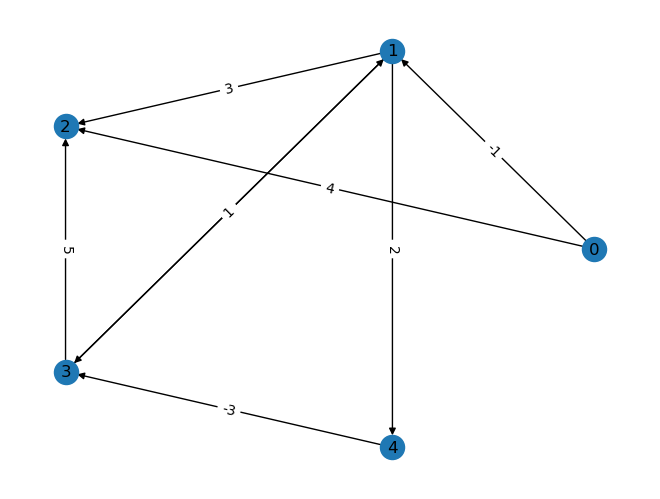

In [7]:
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels = True)
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

In [12]:
g = graph

print("Алгоритм Беллмана-Форда :")
g.printArr(g.BellmanFord(0))

Алгоритм Беллмана-Форда :
Расстояние вершины от источника
 0 		  0
 1 		 -1
 2 		  2
 3 		 -2
 4 		  1
 5 		  0


In [9]:
g = graph

print("Алгоритм Дейкстры:")
g.printArr(g.dijkstra(0))

Алгоритм Дейкстры:
Расстояние вершины от источника
 0 		  0
 1 		 -1
 2 		  2
 3 		 -2
 4 		  1


In [10]:
g = graph

print("Алгоритм Флойда-Уоршелла:")
g.printArr(g.floydWarshall())

Алгоритм Флойда-Уоршелла:
Расстояние вершины от источника
 0 		  0
 1 		 -1
 2 		  2
 3 		 -2
 4 		  1


In [11]:
g = graph

print("Алгоритм Джонсона:")
g.printArr(g.Johnson(0))

Алгоритм Джонсона:
Расстояние вершины от источника
 0 		  0
 1 		 -1
 2 		  2
 3 		 -2
 4 		  1
 5 		  0


In [81]:
g = graph

print("Levit algorithm:")
g.printArr(g.levitAlgorithm(0))

Levit algorithm:
Расстояние вершины от источника
 0 		  0
 1 		 -1
 2 		  2
 3 		 -2
 4 		  1
 5 		  0


In [8]:
g = graph

print("Алгоритм Йена:")
g.printArr(g.yenAlgorithm(0))

Алгоритм Йена:
Расстояние вершины от источника
 0 		  0
 1 		 -1
 2 		  2
 3 		 -2
 4 		  1


### Вывод

Реализовали алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

Предусмотрели задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

Разработать графический интерфейс пользователя с визуализацией графа.


| Алгоритм | Временная сложность в худшем случае |
| ----------- | ----------- |
| Беллман-Форд | O(V * E) |
| Дейкстра | O(V^2) |
| Флойд-Уоршелл | O(V^3) |
| Джонсон | O(V^2 * log V + V * E) |
| Левит | O(V * E + V^2 * log V) |
| Йен | O(k * (V + E)) (для k-го кратчайшего пути) |